In [1]:
import xarray as xr
from dask_jobqueue import PBSCluster
from dask.distributed import Client

# Spin up a little cluster with `dask-jobqueue`

### Specs for an individual worker

In [2]:
walltime = '00:10:00'
cores = 1
memory = '4GB'

cluster = PBSCluster(walltime=str(walltime), cores=cores, memory=str(memory),
                     job_extra=['-l ncpus='+str(cores),'-l mem='+str(memory),
                                '-l storage=gdata/v14+scratch/v14'],
                     header_skip=["select"])

### Scale up to n workers

In [3]:
cluster.scale(jobs=4)

In [4]:
client = Client(cluster)
client

Client Scheduler: tcp://10.6.73.61:41705 Dashboard: http://10.6.73.61:8787/status,Cluster Workers: 4 Cores: 4 Memory: 16.00 GB


# Do something with the cluster

In [5]:
test = xr.open_zarr('/g/data/v14/ds0092/data/ZARR/csiro-dcfp-jra55/surface_month.zarr.zip',
                    consolidated=True)

In [6]:
# Get the monthly anomalies of temperature
anom = test['TMP_GDS0_HTGL'].groupby(
    'initial_time0_hours.month').apply(
    lambda x: x - x.mean('initial_time0_hours'))

/g/data/v14/ds0092/software/miniconda3/envs/pangeo/lib/python3.8/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 62 times more chunks
  return self.array[key]


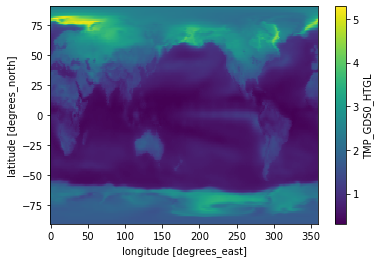

In [7]:
# Plot the standard deviation of the anomalies
anom.std('initial_time0_hours').plot()

In [8]:
cluster.close()
client.close()